In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"


'Colab Notebooks'   PH24.png   PH33.png   photo
 dataset	    PH26.png   PH34.png  'Photo album.gslides'
 PH19.png	    PH27.png   PH36.png  'RASHI IX-B(12).pdf'
 PH20.png	    PH28.png   PH37.png  'vmf-aquv-iui – 31 Jul 2021.pdf'
 PH21.png	    PH29.png   PH38.png
 PH22.png	    PH30.png   PH40.png
 PH23.png	    PH31.png   PH41.png


In [ ]:
!ls "/content/drive/MyDrive/dataset"


test  train


In [ ]:
data_dir = "/content/drive/MyDrive/dataset/train"


In [ ]:
import os
os.listdir('/content/drive/MyDrive/dataset/train')


['rottenoranges',
 'rottenapples',
 'freshoranges',
 'rottenbanana',
 'freshapples',
 'freshbanana']

In [ ]:
# ======================================
# STEP 1: LOAD DATASET FROM FOLDER
# ======================================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Define the dataset directory
data_dir = "/content/drive/MyDrive/dataset/train"  # <-- updated path

# Check folder structure
print("Classes found:", os.listdir(data_dir))


Classes found: ['rottenoranges', 'rottenapples', 'freshoranges', 'rottenbanana', 'freshapples', 'freshbanana']


Classes found: ['rottenoranges', 'rottenapples', 'freshoranges', 'rottenbanana', 'freshapples', 'freshbanana']

Image Count Summary:
            Class  Image Count
0  rottenoranges         1595
1   rottenapples         2342
2   freshoranges         1466
3   rottenbanana         2224
4    freshapples         1693
5    freshbanana         1581


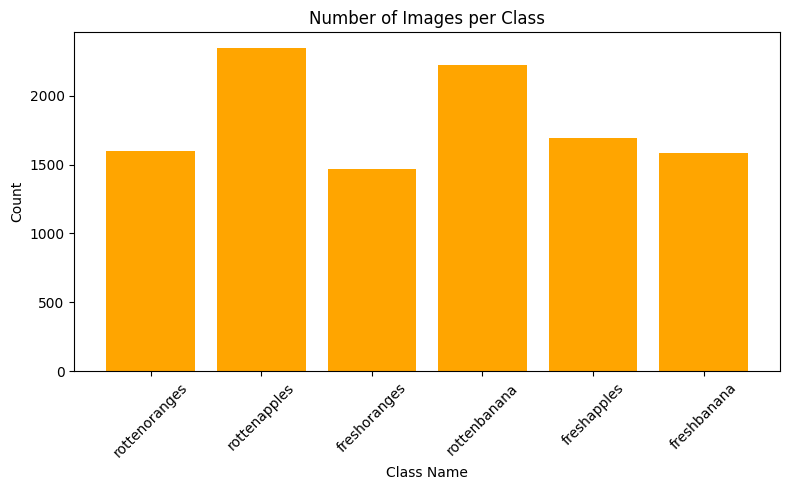

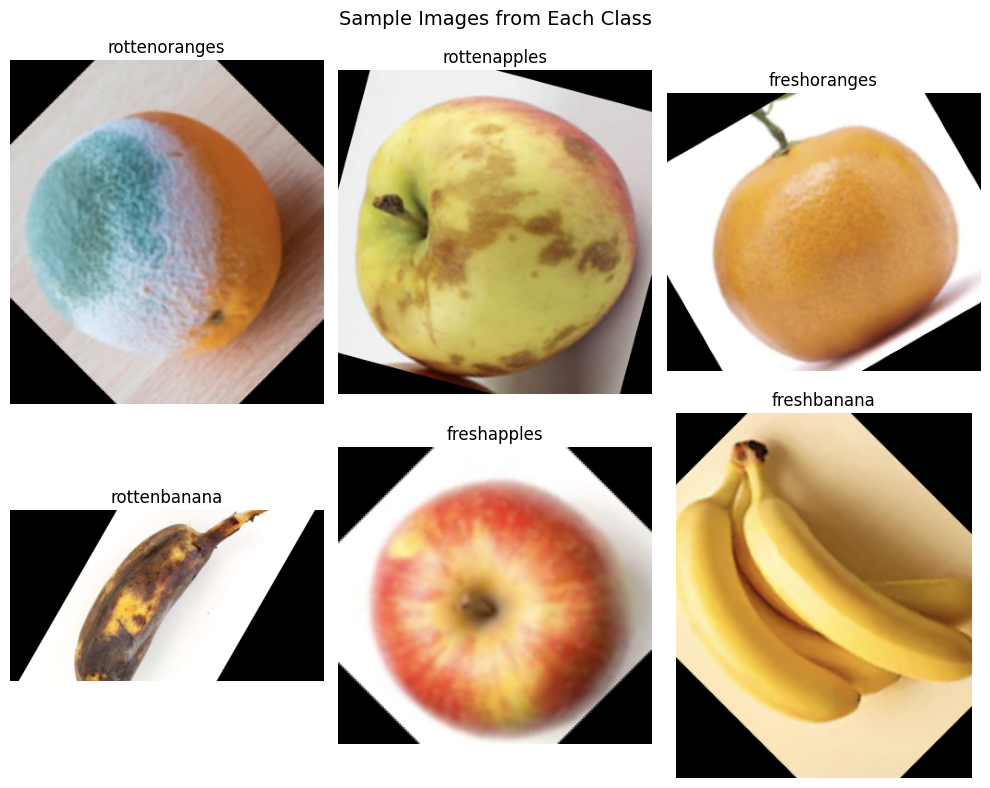


Image Shape: (268, 244, 3)
Pixel Value Range: 0 to 249
Mean Pixel Intensity: 134.73, Standard Deviation: 72.41


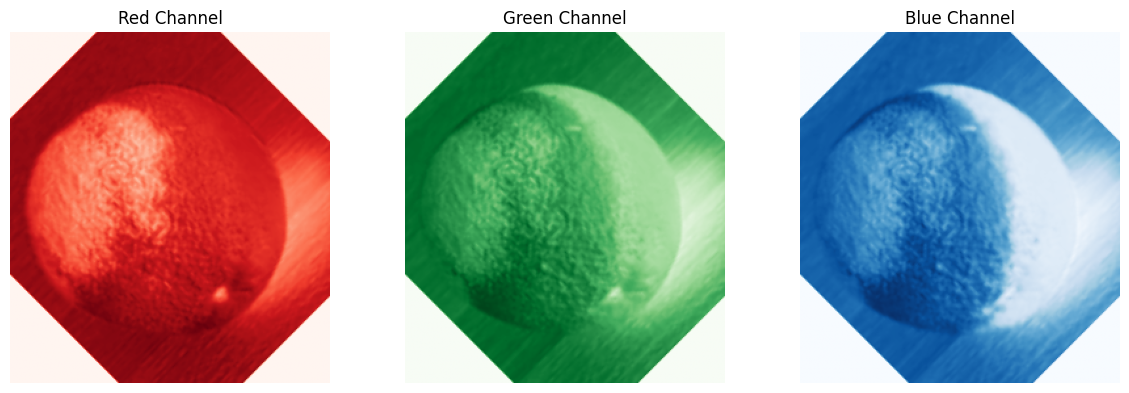


Scaled Feature Values: [[0. 0.]]


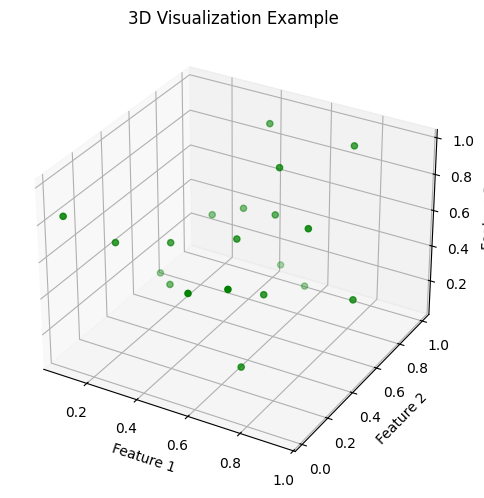

In [ ]:
# ======================================
# STEP 1: LOAD DATASET FROM GOOGLE DRIVE
# ======================================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# Define the dataset directory (update path as per your Drive)
data_dir = "/content/drive/MyDrive/dataset/train"

# Check folder structure
print("Classes found:", os.listdir(data_dir))

# ======================================
# STEP 2: COUNT IMAGES IN EACH CLASS
# ======================================

classes = os.listdir(data_dir)
data_summary = {}

for cls in classes:
    path = os.path.join(data_dir, cls)
    data_summary[cls] = len(os.listdir(path))

# Create a DataFrame summary
df_summary = pd.DataFrame(list(data_summary.items()), columns=['Class', 'Image Count'])
print("\nImage Count Summary:\n", df_summary)

# Plot the counts
plt.figure(figsize=(8,5))
plt.bar(df_summary['Class'], df_summary['Image Count'], color='orange')
plt.title('Number of Images per Class')
plt.xticks(rotation=45)
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# ======================================
# STEP 3: DISPLAY SAMPLE IMAGES
# ======================================

plt.figure(figsize=(10,8))

for i, cls in enumerate(classes[:6]):
    path = os.path.join(data_dir, cls)
    img_name = os.listdir(path)[0]
    img = plt.imread(os.path.join(path, img_name))
    plt.subplot(2,3,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.suptitle("Sample Images from Each Class", fontsize=14)
plt.tight_layout()
plt.show()

# ======================================
# STEP 4: BASIC IMAGE FEATURE EXTRACTION
# ======================================

# Read one image to analyze features
sample_path = os.path.join(data_dir, classes[0], os.listdir(os.path.join(data_dir, classes[0]))[0])
img = cv2.imread(sample_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print("\nImage Shape:", img_rgb.shape)
print("Pixel Value Range:", img_rgb.min(), "to", img_rgb.max())

# Convert to grayscale
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Compute basic pixel statistics
mean_val = np.mean(gray)
std_val = np.std(gray)
print(f"Mean Pixel Intensity: {mean_val:.2f}, Standard Deviation: {std_val:.2f}")

# Visualize color channels
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(img_rgb[:,:,0], cmap='Reds')
ax[0].set_title("Red Channel")
ax[1].imshow(img_rgb[:,:,1], cmap='Greens')
ax[1].set_title("Green Channel")
ax[2].imshow(img_rgb[:,:,2], cmap='Blues')
ax[2].set_title("Blue Channel")
for a in ax: a.axis('off')
plt.tight_layout()
plt.show()

# ======================================
# STEP 5: OPTIONAL - FEATURE SCALING DEMO
# ======================================

# Create small feature array [Mean, Std]
features = np.array([[mean_val, std_val]])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print("\nScaled Feature Values:", scaled_features)

# ======================================
# STEP 6: OPTIONAL - 3D VISUALIZATION DEMO
# ======================================

# Simulated feature points for 3D plot
np.random.seed(0)
X = np.random.rand(20, 3)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], color='green')
ax.set_title("3D Visualization Example")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.tight_layout()
plt.show()
